In [30]:
#team11
#Importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tqdm.autonotebook import tqdm

import numpy as np #
import pandas as pd 

from keras import Sequential
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam, SGD
tf.keras.optimizers.legacy.Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
# from keras import regularizers
from tensorflow.keras.models import Model


from keras.preprocessing.image import load_img


In [2]:
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")
tf.config.list_physical_devices("GPU")

GPU not available :(


[]

In [3]:

labels = pd.read_csv('labels.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [4]:
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

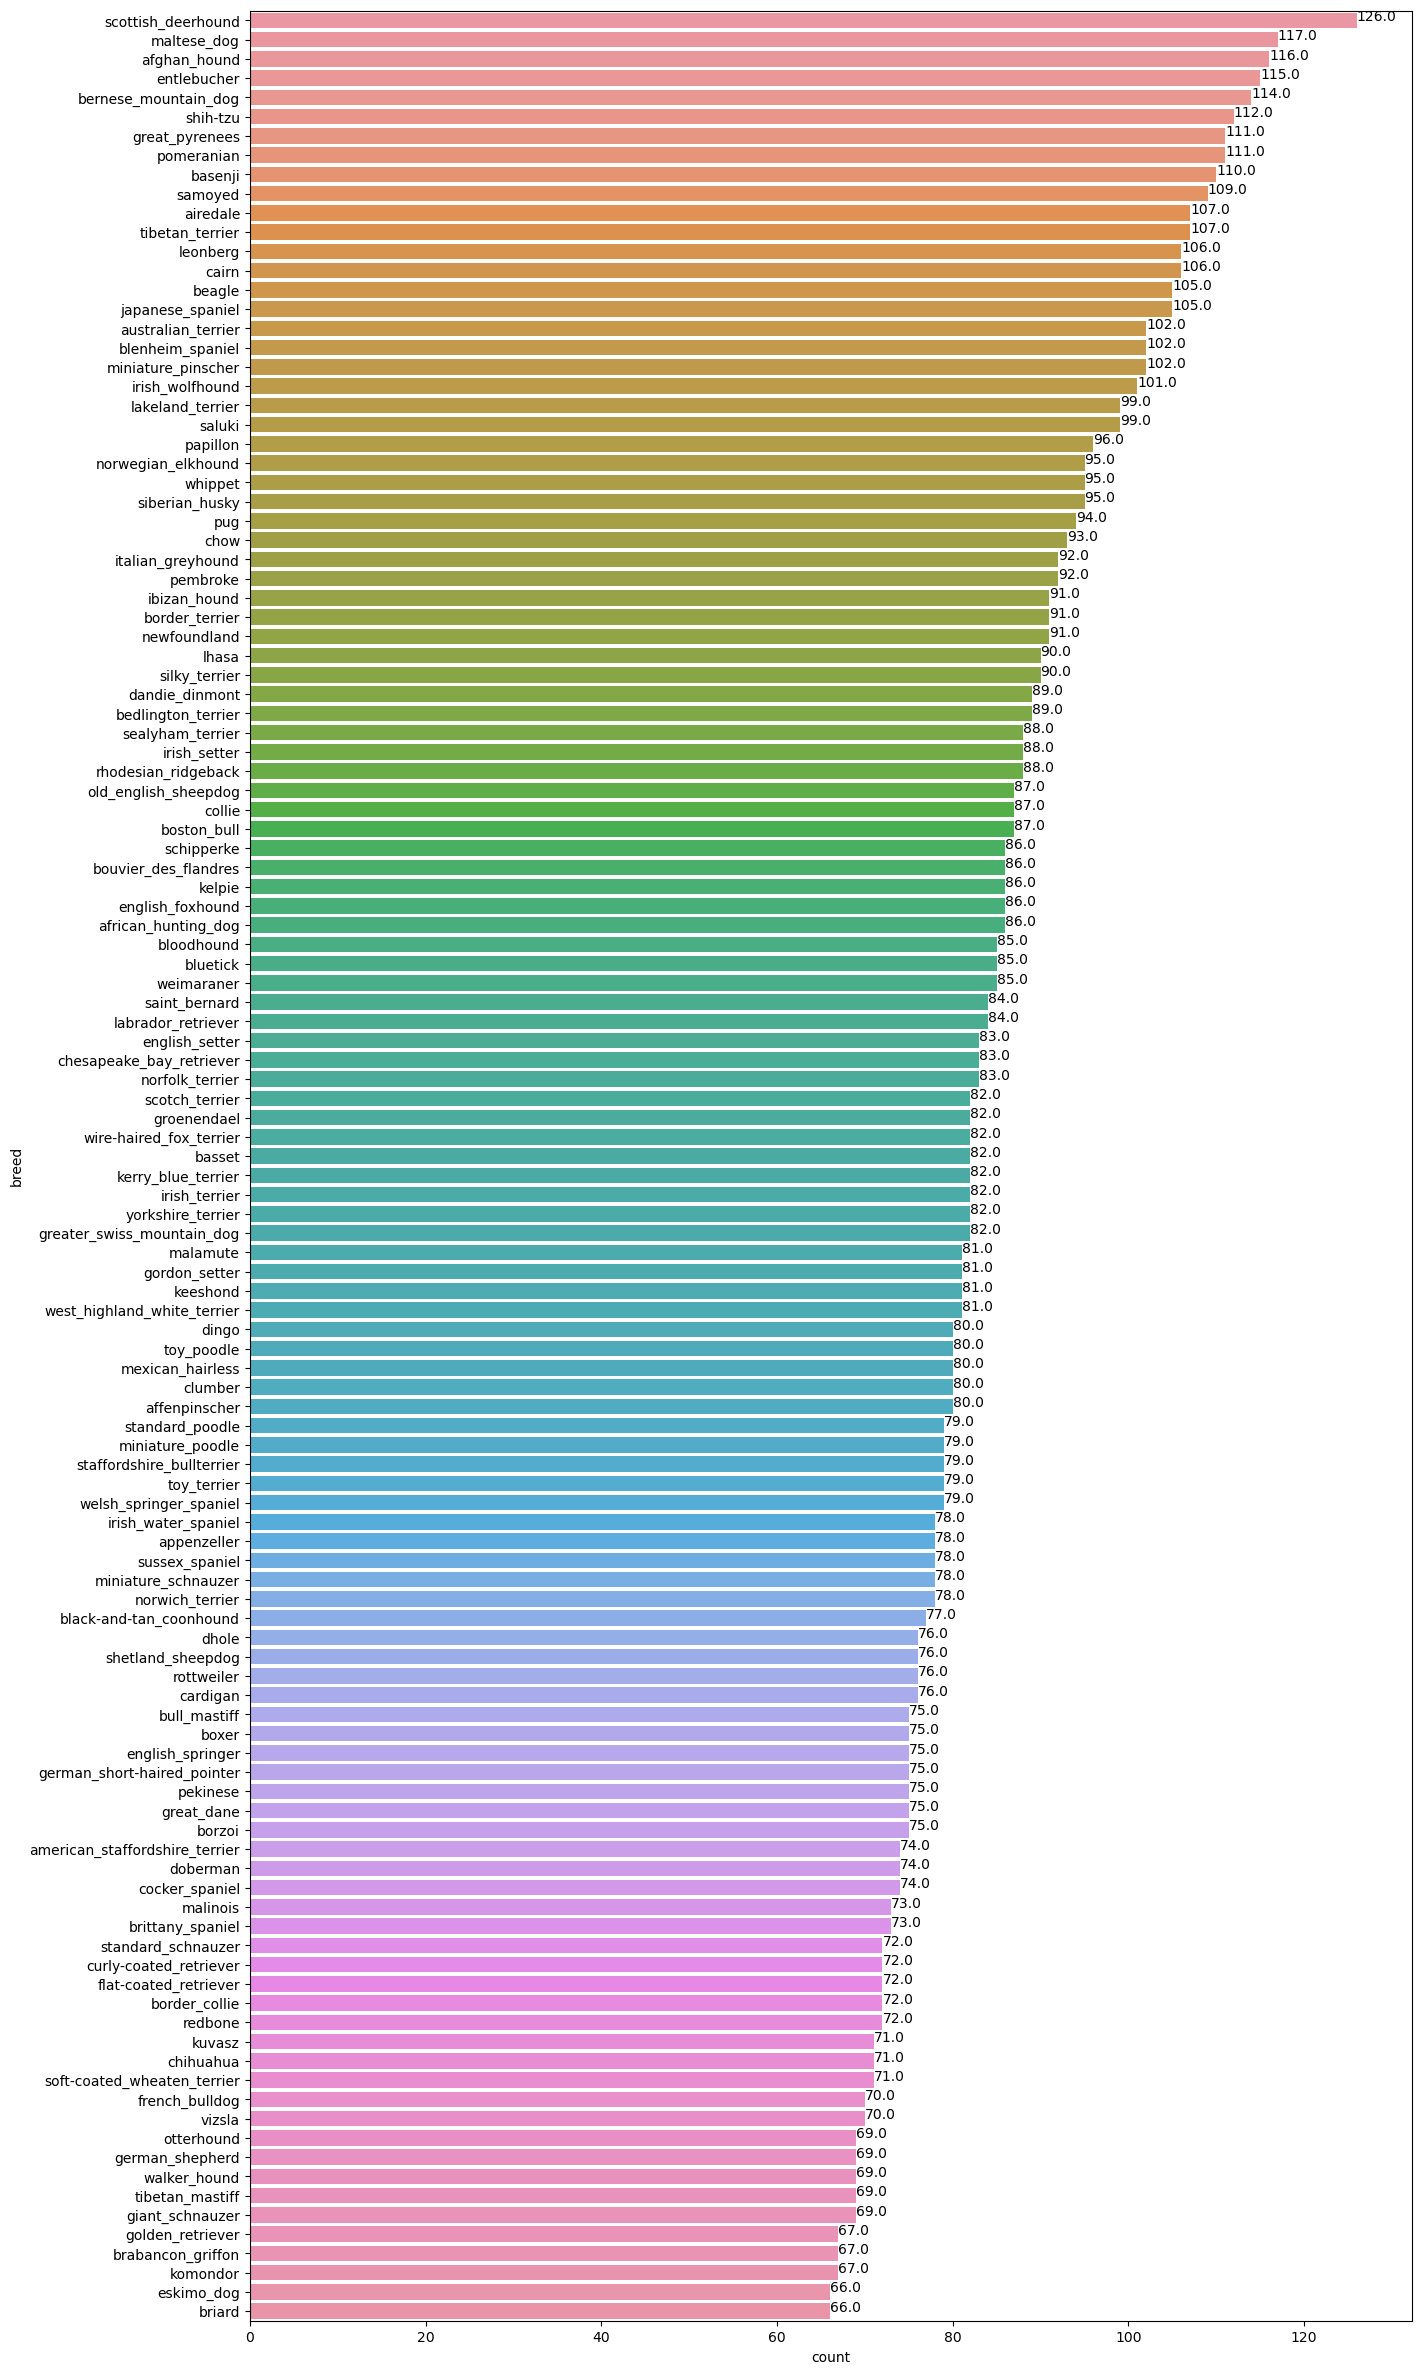

In [5]:
def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        


plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=labels['breed'],order=labels['breed'].value_counts().index)
barw(ax0)
plt.show()

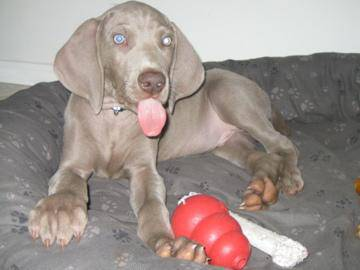

In [6]:
# one image
from IPython.display import display, Image
Image("C:\\Users\\yenug\\Downloads\\dog-breed-identi\\train\\ffbbf7536ba86dcef3f360bda41181b4.jpg")

In [7]:
import os
if len(os.listdir("C:\\Users\\yenug\\Downloads\\dog-breed-identi\\train")) == len(labels['id']):
    print('Number of file matches number of actual images!')
else:
    print('Number of file doesnot matches number of actual images!!')

Number of file matches number of actual images!


In [8]:
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))




class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [9]:
input_shape = (331,331,3)


def images_to_array(directory, label_dataframe, target_size = input_shape):
    
    image_labels = label_dataframe['breed']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)
    
    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
        
        dog_breed = image_labels[ix]
        y[ix] = class_to_num[dog_breed]
    
    y = to_categorical(y)
    
    return images,y


In [10]:
import time 
t = time.time()

X,y = images_to_array("C:\\Users\\yenug\\Downloads\\dog-breed-identi\\train", labels[:])

print('runtime in seconds: {}'.format(time.time() - t))

  0%|          | 0/10222 [00:00<?, ?it/s]

runtime in seconds: 163.91462230682373


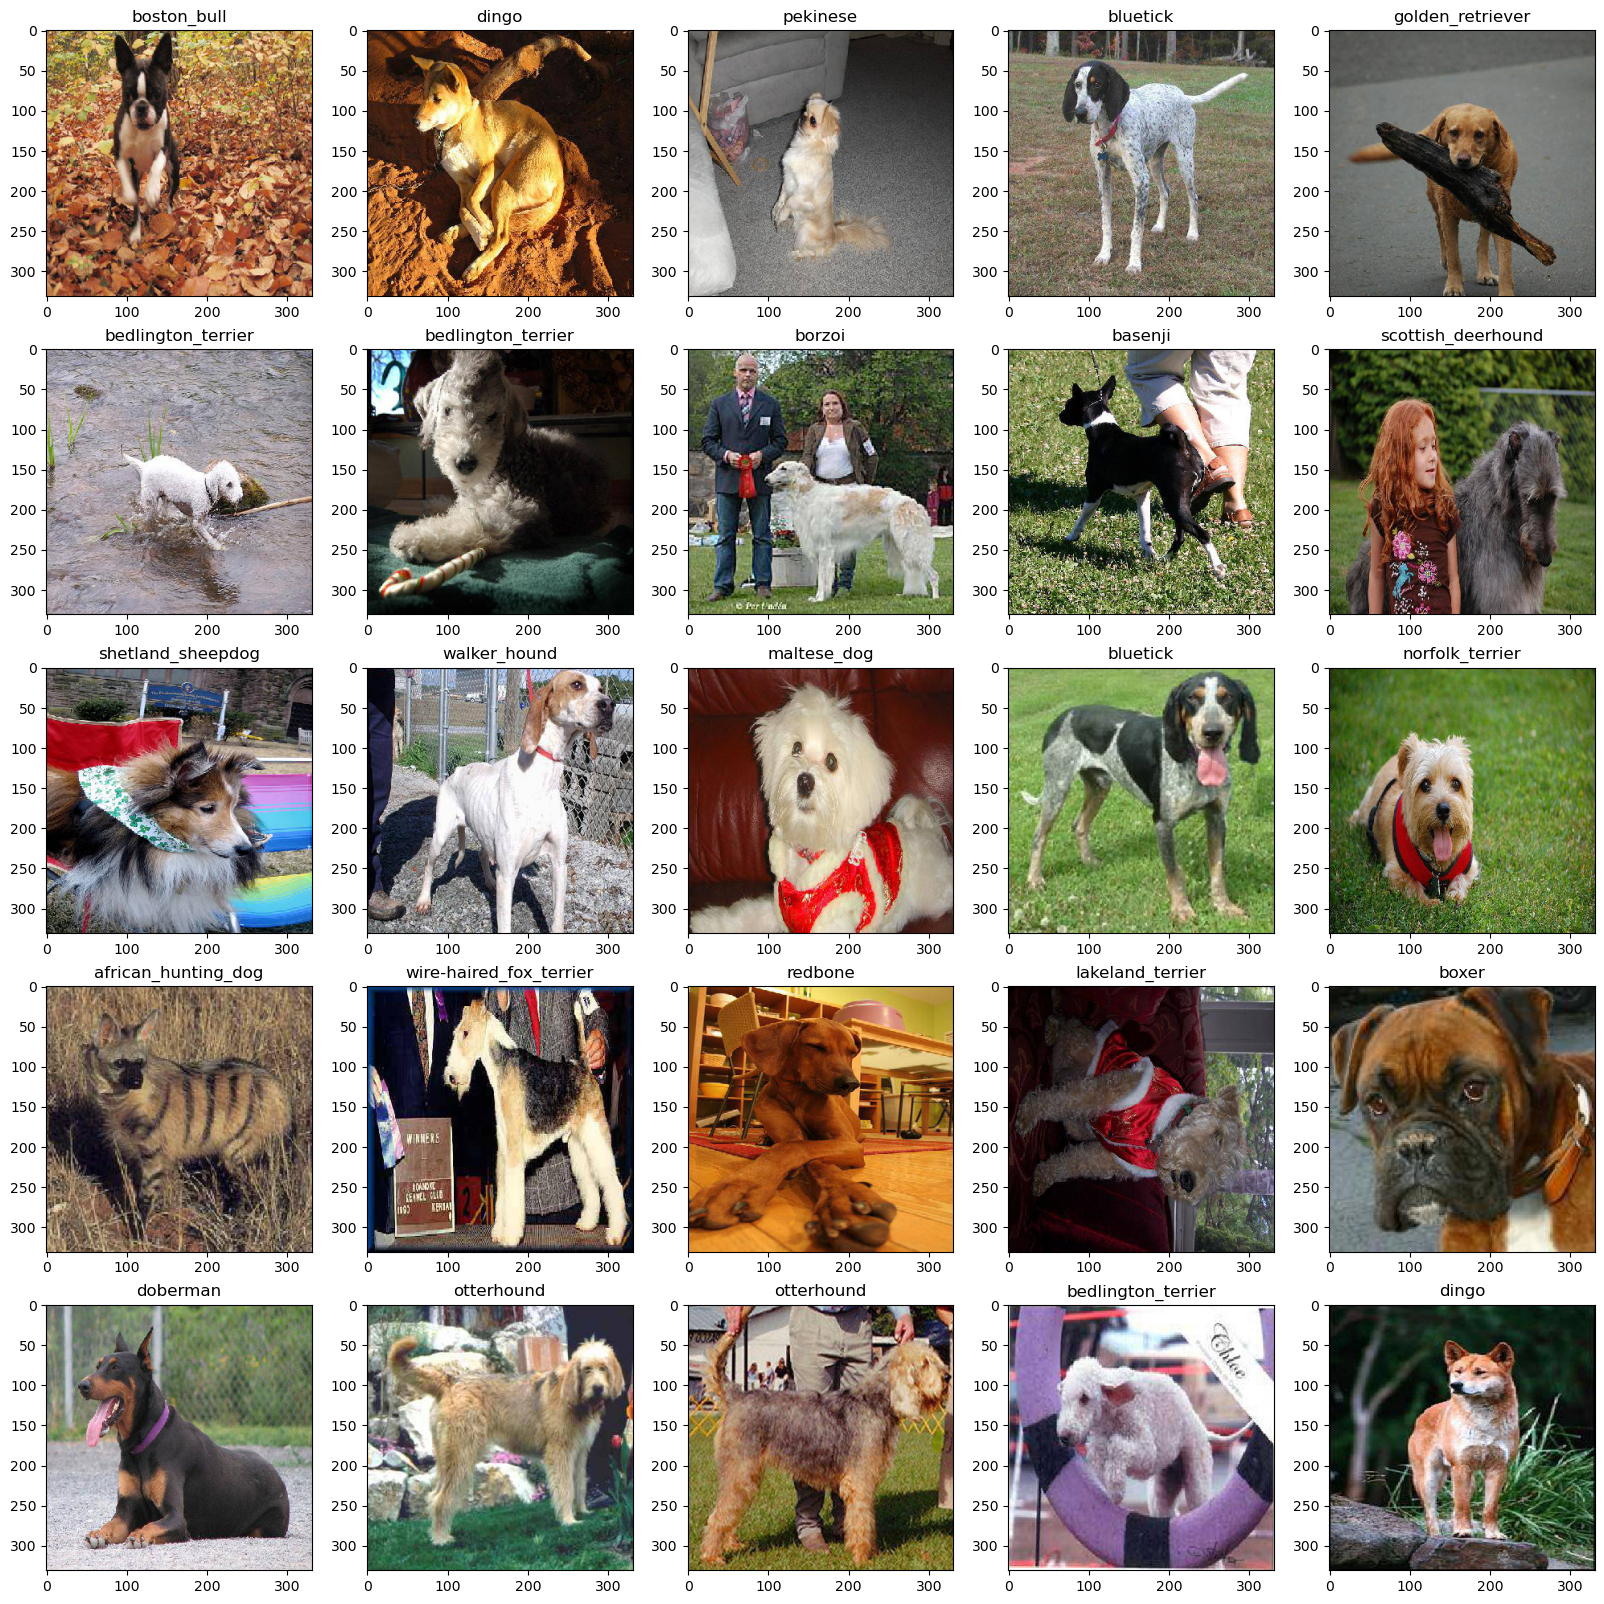

In [11]:
n=25

# setup the figure 
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32')) # .astype('int32') ---> as imshow() needs integer data to read the image

In [12]:

lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [13]:
# "C:\\Users\\yenug\\Downloads\\dog-breed-identi\\train\\ffa4e1bf959425bad9228b04af40ac76.jpg")
batch_size= 128
epochs=50
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

In [14]:
# Function to extract features from the dataset by a given pretrained model
img_size = (331, 331, 3)

def get_features(model_name, model_preprocessor, input_size, data):
    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs=input_layer, outputs=avg)
    
    # Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps


In [15]:
# Extract features using InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)



320/320 [==============================] - 1769s 6s/step
Feature maps shape:  (10222, 2048)


In [16]:
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)


320/320 [==============================] - 1725s 5s/step
Feature maps shape:  (10222, 2048)


In [17]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input
inc_resnet_features = get_features(InceptionResNetV2,
                                   inc_resnet_preprocessor,
                                   img_size, X)

320/320 [==============================] - 2111s 7s/step
Feature maps shape:  (10222, 1536)


In [18]:
# Extract features using NASNetLarge 
from keras.applications.nasnet import NASNetLarge, preprocess_input
nasnet_preprocessor = preprocess_input
nasnet_features = get_features(NASNetLarge,
                               nasnet_preprocessor,
                               img_size, X)

320/320 [==============================] - 3955s 12s/step
Feature maps shape:  (10222, 4032)


In [19]:
del X #to free up some ram memory
gc.collect()

155114

In [20]:

final_features = np.concatenate([inception_features,
                                 xception_features,
                                 nasnet_features,
                                 inc_resnet_features,], axis=-1) #axis=-1 to concatinate horizontally

print('Final feature maps shape', final_features.shape)

Final feature maps shape (10222, 9664)


In [33]:

model = Sequential()
#model.add(Dense(1028,input_shape=(final_features.shape[1],)))
model.add(Dropout(0.7,input_shape=(final_features.shape[1],)))
model.add(Dense(n_classes,activation= 'softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the model. 
history = model.fit(final_features, y,batch_size=batch_size,epochs=epochs,validation_split=0.2,callbacks=[lrr,EarlyStop])


Epoch 1/50

64/64 [==============================] - 4s 40ms/step - loss: 0.9818 - accuracy: 0.8085 - val_loss: 0.1827 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 2/50
64/64 [==============================] - 2s 32ms/step - loss: 0.1784 - accuracy: 0.9430 - val_loss: 0.1841 - val_accuracy: 0.9389 - lr: 0.0010
Epoch 3/50
64/64 [==============================] - 2s 30ms/step - loss: 0.1363 - accuracy: 0.9578 - val_loss: 0.1827 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 4/50
64/64 [==============================] - 2s 30ms/step - loss: 0.1134 - accuracy: 0.9638 - val_loss: 0.1863 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 5/50
64/64 [==============================] - 2s 32ms/step - loss: 0.0956 - accuracy: 0.9686 - val_loss: 0.1883 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 6/50
64/64 [==============================] - 2s 32ms/step - loss: 0.0757 - accuracy: 0.9762 - val_loss: 0.1957 - val_accuracy: 0.9403 - lr: 0.0010
Epoch 7/50
64/64 [==============================] - 2s 30ms/step - loss: 0

In [34]:
#deleting to free up ram memory

del inception_features
del xception_features
del nasnet_features
del inc_resnet_features
del final_features
gc.collect()

15079

In [38]:
def images_to_array_test(test_path, img_size = (331,331,3)):
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]

    data_size = len(test_filenames)
    images = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)
    
    
    for ix,img_dir in enumerate(tqdm(test_filenames)):
#         img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = img_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
    print('Ouptut Data Size: ', images.shape)
    return images

test_data = images_to_array_test("C:\\Users\\yenug\\Downloads\\dog-breed-identi\\test\\", img_size)

  0%|          | 0/10357 [00:00<?, ?it/s]

Ouptut Data Size:  (10357, 331, 331, 3)


In [39]:
#Extract test data features.
def extact_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    xception_features = get_features(Xception, xception_preprocessor, img_size, data)
    nasnet_features = get_features(NASNetLarge, nasnet_preprocessor, img_size, data)
    inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     nasnet_features,
                                     inc_resnet_features],axis=-1)
    
    print('Final feature maps shape', final_features.shape)
    
    #deleting to free up ram memory
    del inception_features
    del xception_features
    del nasnet_features
    del inc_resnet_features
    gc.collect()
    
    
    return final_features

test_features = extact_features(test_data)

324/324 [==============================] - 978s 3s/step
Feature maps shape:  (10357, 2048)
324/324 [==============================] - 1918s 6s/step
Feature maps shape:  (10357, 2048)
324/324 [==============================] - 5106s 16s/step
Feature maps shape:  (10357, 4032)
324/324 [==============================] - 2065s 6s/step
Feature maps shape:  (10357, 1536)
Final feature maps shape (10357, 9664)


In [40]:
del test_data
gc.collect()

0

In [41]:

pred = model.predict(test_features)

324/324 [==============================] - 1s 4ms/step


In [42]:
print(pred[0])
print(f"Max value (probability of prediction): {np.max(pred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(pred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(pred[0])]}")

[2.14307374e-06 2.31759986e-06 2.66617633e-07 1.28489546e-07
 2.62058677e-07 2.88182349e-07 1.43654120e-07 3.80943476e-07
 1.33839706e-07 1.14495556e-07 1.49352573e-07 2.24128016e-07
 7.33361958e-07 7.08822772e-05 1.60610784e-06 8.15292310e-07
 2.31422405e-07 9.41099998e-08 7.93240645e-07 1.06384675e-06
 3.14206630e-07 6.83275857e-07 3.16510182e-06 1.60963879e-07
 2.41443502e-07 6.68725193e-07 8.19443642e-08 2.66084982e-07
 2.51519481e-07 2.25332792e-06 9.69601956e-07 1.04152741e-06
 1.57195768e-06 3.36536368e-06 3.12623399e-07 1.06514165e-07
 1.49386551e-06 2.00231440e-07 3.41666095e-07 5.22224127e-07
 3.25190996e-07 3.00451177e-07 6.22795881e-07 1.46578213e-06
 5.13938573e-07 1.03109403e-06 8.19729635e-08 4.32889067e-07
 3.25653730e-07 6.95443873e-07 8.10898712e-07 2.46862669e-07
 8.31868988e-07 1.46167110e-06 3.55408389e-07 9.04478952e-07
 2.40595114e-07 9.33087350e-08 2.25684332e-07 2.84597121e-07
 2.45633998e-07 9.95485067e-01 2.31483864e-06 2.19516053e-07
 4.62985440e-07 5.664576

In [43]:
preds_df = pd.DataFrame(columns=["id"] + list(classes))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [44]:
test_path = "C:\\Users\\yenug\\Downloads\\dog-breed-identi\\test"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [45]:
preds_df.loc[:,list(classes)]= pred

preds_df.to_csv('submission.csv',index=None)
preds_df.head()

C:\Users\yenug\AppData\Local\Temp\ipykernel_26172\758748232.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  preds_df.loc[:,list(classes)]= pred


id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   2.143074e-06      0.000002   
1  00102ee9d8eb90812350685311fe5890   2.320377e-06      0.000002   
2  0012a730dfa437f5f3613fb75efcd4ce   5.287967e-07      0.000046   
3  001510bc8570bbeee98c8d80c8a95ec1   4.445204e-05      0.000017   
4  001a5f3114548acdefa3d4da05474c2e   7.381201e-03      0.000096   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.666176e-07  1.284895e-07                    2.620587e-07   
1         1.427613e-06  1.066495e-06                    2.106422e-06   
2         1.942160e-06  1.671061e-06                    7.044934e-07   
3         2.571101e-06  9.852760e-07                    6.255826e-06   
4         2.615030e-05  5.176948e-06                    5.313172e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.881823e-07        1.436541e-07  3.809435e-07  1.338397e-07  ...   
1  5.151313e-06        1.092881e-06  4.102893e-06  5.938548e-07  ...   
2  3.565151e-06        2.232380e-07  5.138649e-07  1.964137e-06  ...   
3  1.033779e-05        4.045107e-07  1.909391e-05  1.644105e-06  ...   
4  4.633760e-05        4.740083e-05  3.346775e-05  2.724912e-05  ...   

   toy_poodle  toy_terrier        vizsla  walker_hound    weimaraner  \
0    0.000002     0.000002  2.214964e-07  7.800174e-07  3.265450e-07   
1    0.000008     0.000002  1.201148e-06  1.394431e-05  3.381349e-06   
2    0.000001     0.000003  2.275180e-06  1.037368e-05  6.616174e-06   
3    0.000012     0.000011  1.051589e-06  1.455433e-05  4.357236e-06   
4    0.000109     0.000127  1.825046e-05  7.920133e-05  2.309874e-05   

   welsh_springer_spaniel  west_highland_white_terrier   whippet  \
0            2.601004e-07                 3.315817e-07  0.000001   
1            1.258596e-06                 4.388464e-05  0.000007   
2            7.780495e-06                 2.735252e-07  0.000005   
3            1.284300e-06                 9.134871e-06  0.000532   
4            4.900524e-06                 2.609948e-05  0.000227   

   wire-haired_fox_terrier  yorkshire_terrier  
0             6.859220e-07       8.330471e-07  
1             2.002586e-06       4.832716e-06  
2             1.080419e-06       1.849925e-06  
3             3.990895e-07       1.361505e-05  
4             2.436107e-05       3.956171e-04  

[5 rows x 121 columns]

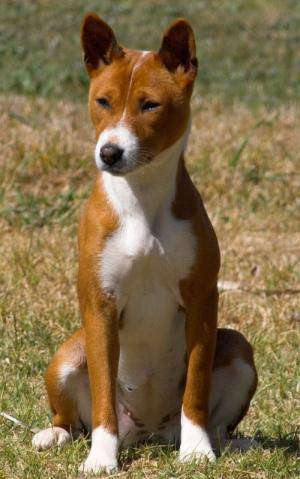

In [46]:
Image("C:\\Users\\yenug\\Downloads\\dog-breed-identi\\train\\ffa4e1bf959425bad9228b04af40ac76.jpg")

In [64]:
img_g = load_img("C:\\Users\\yenug\\Downloads\\dog-breed-identi\\train\\",target_size = img_size)
img_g = np.expand_dims(img_g, axis=0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yenug\\Downloads\\dog-breed-identi\\train\\'

In [60]:
img_g.shape

(1, 331, 331, 3)

In [59]:
test_features = extact_features(img_g)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 [==============================] - 2s 2s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 1s 1s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 10s 10s/step
Feature maps shape:  (1, 4032)
1/1 [==============================] - 6s 6s/step
Feature maps shape:  (1, 1536)
Final feature maps shape (1, 9664)
1/1 [==============================] - 0s 32ms/step
Predicted label: basenji
Probability of prediction): 100 %
